<a href="https://colab.research.google.com/github/souparnabose99/finbert-transformer-classification/blob/main/Finbert_Sentinment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sentiment Analysis with Transformers:

The HuggingFace Transformers library is presently the most advanced and accessible library for building and using transformer models. As such, it will be what we primarily use throughout these notebooks.

To apply sentiment analysis using the transformers library, we first need to decide on a model to use - as we will be applying a pretrained model, rather than starting from scratch. The list of models available can be found at:
* https://huggingface.co/ProsusAI/finbert

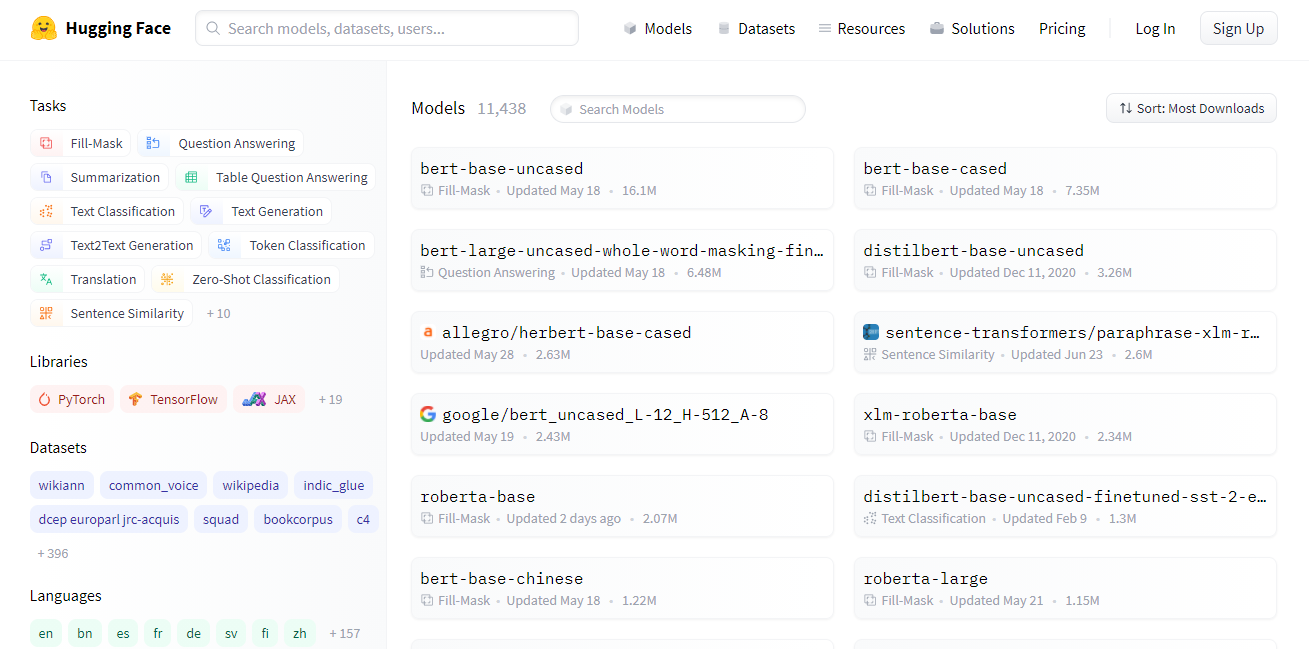

FinBERT is a pre-trained NLP model to analyze sentiment of financial text. It is built by further training the BERT language model in the finance domain, using a large financial corpus and thereby fine-tuning it for financial sentiment classification. Financial PhraseBank by Malo et al. (2014) is used for fine-tuning. For more details, please see the paper FinBERT: Financial Sentiment Analysis with Pre-trained Language Models and our related blog post on Medium.

The model will give softmax outputs for three labels: positive, negative or neutral.
* https://huggingface.co/ProsusAI/finbert

In [5]:
model_name = "ProsusAI/finbert"

The typical flow of information through a sentiment classification model consists of four steps:

* Raw text data is tokenized (converted into numerical IDs that map that word to a vector representation of the same word)

* Token IDs are fed into the sentiment model

* A set of values are output, each value represents a class, and the value represents probability of that being the correct sentiment class, from zero (definitely not) to one (definitely yes).

* The argmax of this output array is taken to give us our winning sentiment classification.

We do not always have the three outputs classes [positive, negative, and neutal], often we will find models that predict just [positive, negative], or models that are more granular [very positive, somewhat positive, neutral, somewhat negative, very negative]. We can change the number of outputs classes (step 3) to fit to the correct number of classes.

### Install transformer library:

In [6]:
!pip install transformers

In [7]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(model_name)

### Initialize Tokenizer:

In [8]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained(model_name)

In [9]:
text = "Japan’s biggest brokerage will stop offering cash prime-brokerage services in the US and Europe, and has given some clients about six months to find a new provider, according to people familiar with the matter, who asked not to be identified discussing the private information. A spokesman for Nomura declined to comment. The pullback comes after Nomura notched up some of the biggest losses from the implosion of the US. family office built by Bill Hwang."

text_2 = "Stock market regulator Securities and Exchange Board of India (Sebi) has banned Authum promoter director Sanjay Dangi and his associates including Alpana Dangi, a promoter director in Authum, along with promoters of four companies from dealing in the equity markets following allegations of price manipulation more than a decade ago."

print(text)
print()
print(text_2)

Japan’s biggest brokerage will stop offering cash prime-brokerage services in the US and Europe, and has given some clients about six months to find a new provider, according to people familiar with the matter, who asked not to be identified discussing the private information. A spokesman for Nomura declined to comment. The pullback comes after Nomura notched up some of the biggest losses from the implosion of the US. family office built by Bill Hwang.

Stock market regulator Securities and Exchange Board of India (Sebi) has banned Authum promoter director Sanjay Dangi and his associates including Alpana Dangi, a promoter director in Authum, along with promoters of four companies from dealing in the equity markets following allegations of price manipulation more than a decade ago.


In [11]:
tokens_1 = tokenizer.encode_plus(text, max_length=512, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='pt')
tokens_2 = tokenizer.encode_plus(text, max_length=512, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='pt')

### Bert Special Tokens:

* [CLS] = 101, The classifier token which is used when doing sequence classification (classification of the whole sequence instead of per-token classification). It is the first token of the sequence when built with special tokens.
* [SEP] = 102, The separator token, which is used when building a sequence from multiple sequences, e.g. two sequences for sequence classification or for a text and a question for question answering. It is also used as the last token of a sequence built with special tokens.
* [MASK] = 103, The token used for masking values. This is the token used when training this model with masked language modeling. This is the token which the model will try to predict.
* [UNK] = 100, The unknown token. A token that is not in the vocabulary cannot be converted to an ID and is set to be this token instead.
* [PAD] = 0, The token used for padding, for example when batching sequences of different lengths.

In [12]:
tokens_1

{'input_ids': tensor([[  101,  2900,  1521,  1055,  5221, 20138,  4270,  2097,  2644,  5378,
          5356,  3539,  1011, 20138,  4270,  2578,  1999,  1996,  2149,  1998,
          2885,  1010,  1998,  2038,  2445,  2070,  7846,  2055,  2416,  2706,
          2000,  2424,  1037,  2047, 10802,  1010,  2429,  2000,  2111,  5220,
          2007,  1996,  3043,  1010,  2040,  2356,  2025,  2000,  2022,  4453,
         10537,  1996,  2797,  2592,  1012,  1037, 14056,  2005,  2053, 16069,
          6430,  2000,  7615,  1012,  1996,  4139,  5963,  3310,  2044,  2053,
         16069, 18624,  2098,  2039,  2070,  1997,  1996,  5221,  6409,  2013,
          1996, 17727, 10483,  3258,  1997,  1996,  2149,  1012,  2155,  2436,
          2328,  2011,  3021,  1044, 16600,  1012,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,  

### Pass tokens to model as keyword arguments:

In [13]:
output_1 = model(**tokens_1)
output_2 = model(**tokens_2)

output_1

SequenceClassifierOutput([('logits',
                           tensor([[-1.7918,  2.9201, -0.6792]], grad_fn=<AddmmBackward>))])

In [14]:
output_1[0]

tensor([[-1.7918,  2.9201, -0.6792]], grad_fn=<AddmmBackward>)

### Predictions:

In [15]:
import torch.nn.functional as funct

In [16]:
probs_1 = funct.softmax(output_1[0], dim=-1)
probs_2 = funct.softmax(output_2[0], dim=-1)

probs_1

tensor([[0.0087, 0.9649, 0.0264]], grad_fn=<SoftmaxBackward>)

In [17]:
import torch

preds_1 = torch.argmax(probs_1)
preds_2 = torch.argmax(probs_2)

print(preds_1.item())
print(preds_2.item())

1
1
